# CHEOPS secondary eclipse modelling
## Case a: Mixed reflection and thermal emission

**Author:** Hannu Parviainen<br>
**Last edited:** 2.8.2021

While the TESS photometry coveres the whole KELT-1b phase, the CHEOPS photometry covers only the near vicinity of the secondary eclipse. This means that we can't estimate the ellipsoidal variations or Doppler boosting independently for the CHEOPS passband.

In [1]:
%pylab inline
rc('figure', figsize=(13,4))

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from src import CHEOPSLPF

In [3]:
from multiprocessing import Pool
from numba import set_num_threads
set_num_threads(1)

In [4]:
lpf = CHEOPSLPF('a')

In [5]:
def lnposterior(pv):
    return squeeze(lpf.lnposterior(pv))

pool = Pool(processes=16)

In [5]:
lpf.ps

[  0 |G| tc             N(μ = 2455914.1625858527, σ = 0.0003922376973146537) [    -inf ..      inf],
   1 |G| p              N(μ = 1.2174941147192238, σ = 2.009737196417427e-07) [    0.00 ..      inf],
   2 |G| rho            N(μ = 0.5600525747142571, σ = 0.04031149321424281) [    0.00 ..      inf],
   3 |G| b              N(μ = 0.35185558684652285, σ = 0.07266304282874361) [    0.00 ..     1.00],
   4 |G| secw           N(μ = 0.0, σ = 1e-06)                    [   -1.00 ..     1.00],
   5 |G| sesw           N(μ = 0.0, σ = 1e-06)                    [   -1.00 ..     1.00],
   6 |P| k2             N(μ = 0.005830774056037935, σ = 7.218009787979882e-05) [    0.00 ..      inf],
   7 |G| oev            N(μ = 0.03352487297266189, σ = 0.03683471609529325) [    -inf ..      inf],
   8 |G| aev_cheops     N(μ = 0.00047999999999999996, σ = 2.9999999999999997e-05) [    0.00 ..      inf],
   9 |G| adb_cheops     N(μ = 6.3e-05, σ = 6.4e-06)              [    0.00 ..      inf],
  10 |G| log10_ted_cheo

## Find the global posterior mode

Global optimisation:   0%|          | 0/1 [00:00<?, ?it/s]

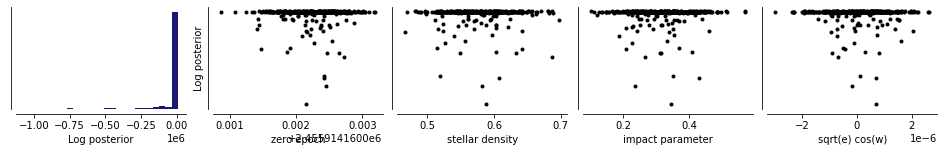

In [6]:
lpf.optimize_global(1, npop=400, pool=pool, vectorize=False, lnpost=lnposterior)

Global optimisation:   0%|          | 0/15000 [00:00<?, ?it/s]

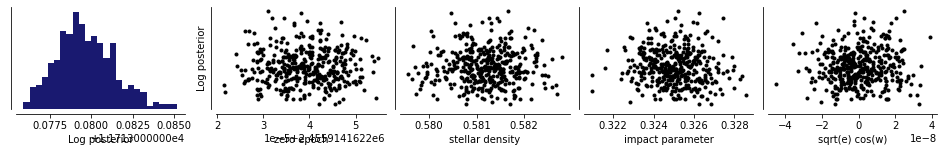

In [5]:
lpf.optimize_global(15000, npop=400, pool=pool, vectorize=False, lnpost=lnposterior)

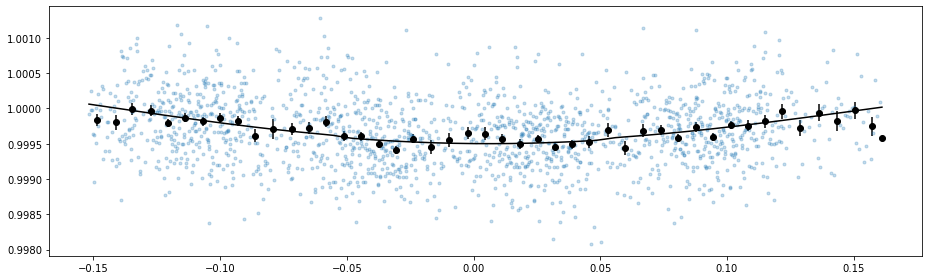

In [6]:
lpf.plot_folded_light_curve();

## Sample the posterior using MCMC

In [7]:
from src.kelt1 import read_mcmc
df = read_mcmc('results/02a_cheops_emission_and theoretical_ev.nc')
sids = permutation(df.values.shape[0])[:lpf.de.n_pop]
starting_population = df.values[sids, :-1].copy()
lpf.sample_mcmc(500, thin=10, repeats=1, save=True, population=starting_population, 
                pool=pool, vectorize=False, lnpost=lnposterior)

MCMC sampling:   0%|          | 0/1 [00:00<?, ?it/s]

Run 1/1:   0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
lpf.sample_mcmc(15000, 100, repeats=3, save=True, pool=pool, vectorize=False, lnpost=lnposterior)

MCMC sampling:   0%|          | 0/3 [00:00<?, ?it/s]

Run 1/3:   0%|          | 0/15000 [00:00<?, ?it/s]

Run 2/3:   0%|          | 0/15000 [00:00<?, ?it/s]

Run 3/3:   0%|          | 0/15000 [00:00<?, ?it/s]

In [8]:
lpf.sample_mcmc(20000, 100, repeats=12, save=True, pool=pool, vectorize=False, lnpost=lnposterior)

MCMC sampling:   0%|          | 0/12 [00:00<?, ?it/s]

Run 1/12:   0%|          | 0/20000 [00:00<?, ?it/s]

Run 2/12:   0%|          | 0/20000 [00:00<?, ?it/s]

Run 3/12:   0%|          | 0/20000 [00:00<?, ?it/s]

Run 4/12:   0%|          | 0/20000 [00:00<?, ?it/s]

Run 5/12:   0%|          | 0/20000 [00:00<?, ?it/s]

Run 6/12:   0%|          | 0/20000 [00:00<?, ?it/s]

Run 7/12:   0%|          | 0/20000 [00:00<?, ?it/s]

Run 8/12:   0%|          | 0/20000 [00:00<?, ?it/s]

Run 9/12:   0%|          | 0/20000 [00:00<?, ?it/s]

Run 10/12:   0%|          | 0/20000 [00:00<?, ?it/s]

Run 11/12:   0%|          | 0/20000 [00:00<?, ?it/s]

Run 12/12:   0%|          | 0/20000 [00:00<?, ?it/s]

In [10]:
df = lpf.posterior_samples()

<AxesSubplot:>

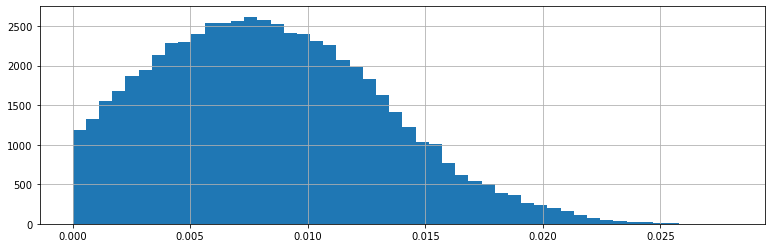

In [11]:
df.ted_cheops.hist(bins=50)

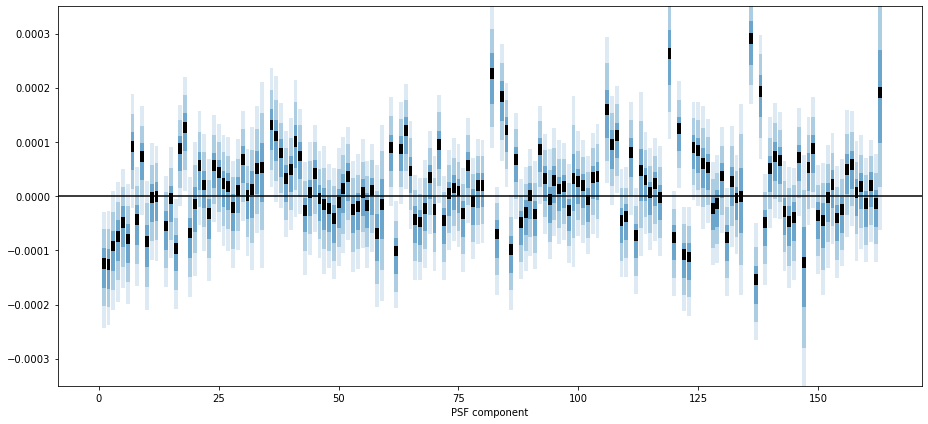

In [17]:
from src.kelt1 import bplot
df = lpf.posterior_samples(derived_parameters=False)

fig, ax = subplots(figsize=(13,6))
bplot(df.iloc[:,lpf._sl_lm])
ax.set_ylim(-0.00035, 0.00035)
setp(ax, xlabel='PSF component')
fig.tight_layout()

---

<center>&copy;2022 Hannu Parviainen</center>